In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
df.drop('CustomerID',axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [29]:
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'})
df

,Gender,Age,Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [30]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender','Age']
df_encoded = df.copy()

label_encoder = LabelEncoder()
for col in columns_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df[col])

df_encoded




,Gender,Age,Income,Spending Score
0,1,1,15,39
1,1,3,15,81
2,0,2,16,6
3,0,5,16,77
4,0,13,17,40
...,...,...,...,...
195,0,17,120,79
196,0,27,126,28
197,1,14,126,74
198,1,14,137,18


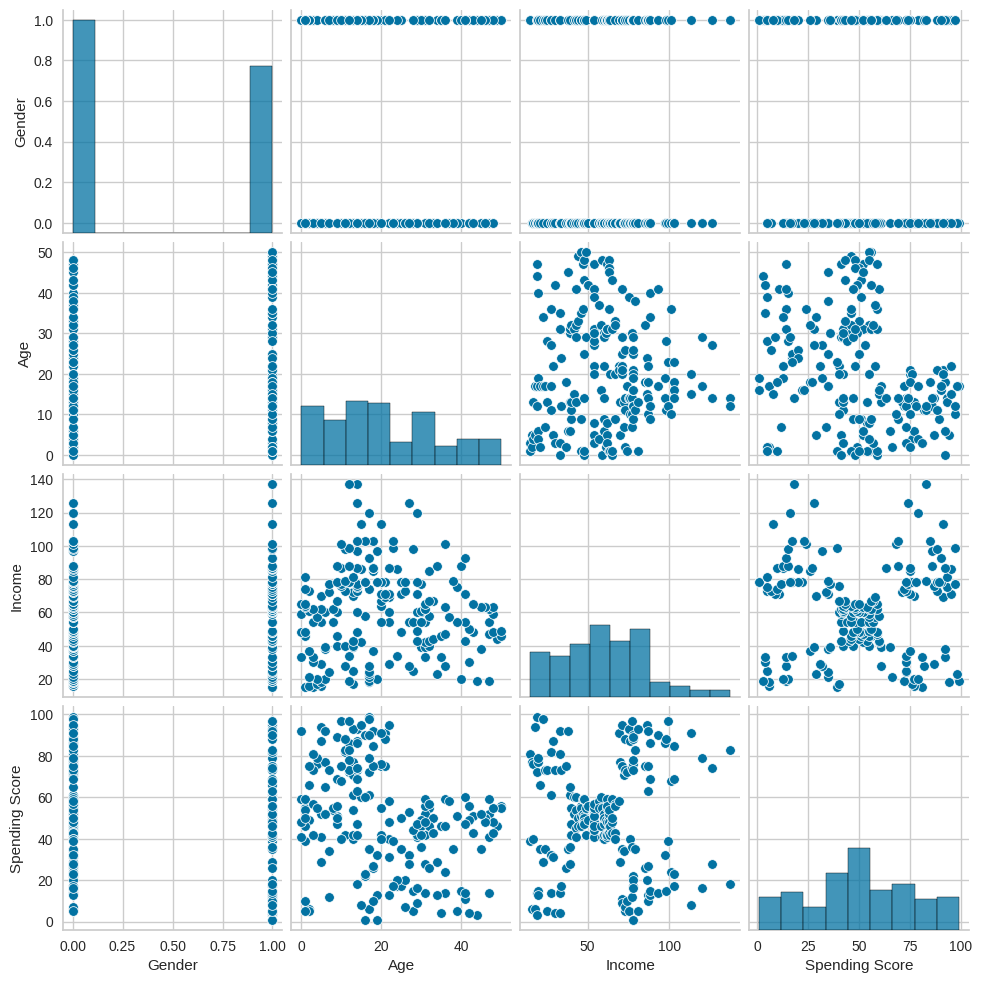

In [31]:
sb.pairplot(df_encoded)

In [33]:
from sklearn.cluster import KMeans

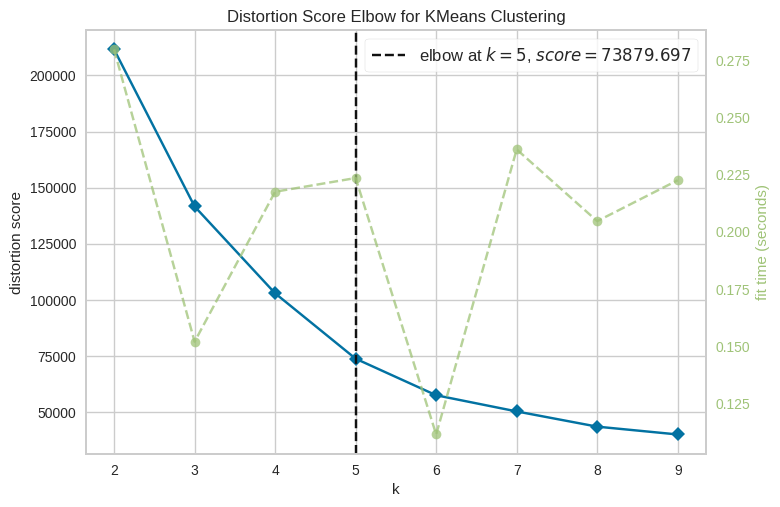

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df_encoded)
visualizer.show()

<Axes: title={'center': 'Mall Customer Segmentation'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

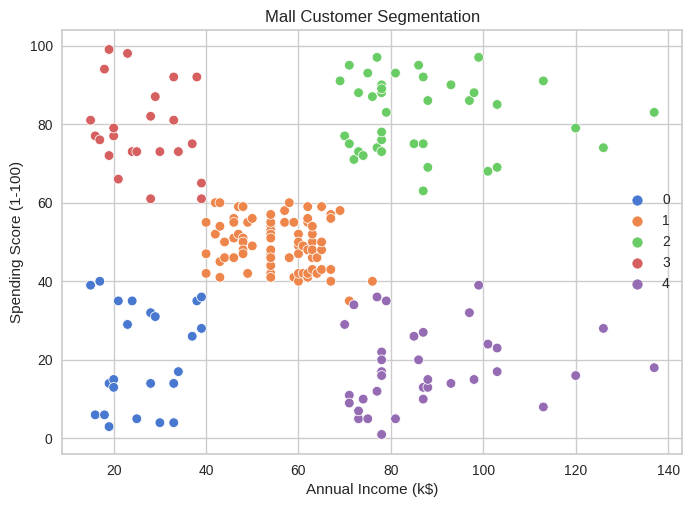

In [79]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df_encoded)
labels=kmeans.labels_

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')
sb.scatterplot(x=df_encoded['Income'], y=df_encoded['Spending Score'], hue=labels, palette='muted')